## Logistic Regression

In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.

Your task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams.

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
## Load Data
# The first two columns contains the exam scores and the third column contains the label.

data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:,:2]
y = data[:, 2]
y = np.reshape(y, (-1, 1))

==================== Part 1: Plotting ====================

We start the exercise by first plotting the data to understand the problem we are working with.

In [3]:
def plotData(X, y):
    """
    PLOTDATA Plots the data points X and y into a new figure 
    PLOTDATA(x,y) plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 matrix.
    """
    
    pos = X[np.isin(y, [1]).ravel()]
    neg = X[np.isin(y, [0]).ravel()]
    fig, ax = plt.subplots()
    plt.scatter(pos[:, 0], pos[:, 1], c='black', marker='+', linewidths=2, label='Admitted')
    plt.scatter(neg[:, 0], neg[:, 1], c='yellow', marker='o', linewidths=2, label='Not Admitted')

In [4]:
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


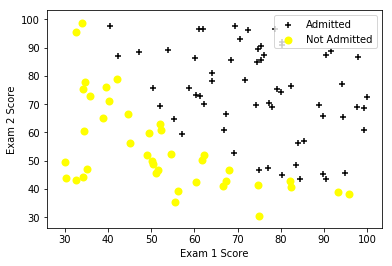

In [5]:
plotData(X, y)
# Labels and Legend
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc='upper right')

============ Part 2: Compute Cost and Gradient ============

In this part of the exercise, you will implement the cost and gradient for logistic regression.

In [6]:
def sigmoid(z):
    """
    SIGMOID Compute sigmoid function
    g = SIGMOID(z) computes the sigmoid of z.
    """
    
    g = 1 / (1 + np.exp(-z))
    
    return g

In [7]:
def costFunction(theta, X, y):
    """
    COSTFUNCTION Compute cost for logistic regression
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    parameter for logistic regression.
    """
    
    m = len(X) # number of training examples
    
    first = np.dot( -y.T, np.log( sigmoid(np.dot(X, theta)) ) )
    second = np.dot( -(1-y).T, np.log (1 - sigmoid(np.dot(X, theta)) ) )
    J = (1/m) * np.sum(first + second)
    
    grad = (1/m) * np.dot( X.T, (sigmoid(np.dot(X, theta)) - y) )
    grad = grad.ravel()
    
    return J, grad

In [8]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x and X_test
X = np.insert(X, 0, 1, axis=1)

# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

In [9]:
# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): ', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros): ')
print(*grad, sep='\n')
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros):  0.6931471805599452
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
-0.1
-12.00921658929115
-11.262842205513591
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [10]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2], ndmin=2).T
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: ', cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta: ')
print(*grad, sep='\n')
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at test theta:  0.2183301938265977
Expected cost (approx): 0.218
Gradient at test theta: 
0.04290299489953443
2.566234115510755
2.646797371082432
Expected gradients (approx):
 0.043
 2.566
 2.647


============= Part 3: Optimizing using fminunc  =============

In the exercise, an Octave function called "fminunc" is used to optimize the parameters given functions to compute the cost and the gradients.  Since we're using Python, we can use SciPy's "optimize" namespace to do the same thing.

Now we can use SciPy's truncated newton (TNC) implementation to find the optimal parameters.

In [11]:
import scipy.optimize as opt

In [12]:
# Run fminunc to obtain the optimal theta
# This function will return theta and the cost 
result = opt.fmin_tnc(func=costFunction, x0=initial_theta.ravel(), args=(X, y.ravel()))

theta = result[0].reshape((-1,1))
cost, _ = costFunction(result[0].reshape((-1,1)), X, y)

#Print theta to screen
print('Cost at theta found by fminunc: ', cost)
print('Expected cost (approx): 0.203')
print('theta: ')
print(*theta.ravel(), sep='\n')
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc:  0.2034977015894742
Expected cost (approx): 0.203
theta: 
-25.16131870069254
0.20623158926972088
0.20147148672057663
Expected theta (approx):
 -25.161
 0.206
 0.201


In [13]:
def mapFeature(X1, X2):
    """
    MAPFEATURE Feature mapping function to polynomial features
    
    MAPFEATURE(X1, X2) maps the two input features
    to quadratic features used in the regularization exercise.
    
    Returns a new feature array with more features, comprising of 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    
    Inputs X1, X2 must be the same size
    """
    
    degree = 6
    out = np.ones( (X1.shape[0], 1) )
    current_col = 1
    
    for i in range(1, degree + 1):
        for j in range(i+1):
            out = np.insert( out, current_col, np.power(X1,i-j) * np.power(X2,j), axis=1 )
            current_col += 1
            
    return out

In [14]:
def plotDecisionBoundary(theta, X, y):
    """
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
    the decision boundary defined by theta
    PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
    positive examples and o for the negative examples. X is assumed to be a either 
    1) Mx3 matrix, where the first column is an all-ones column for the 
       intercept.
    2) MxN, N>3 matrix, where the first column is all-ones
    """
    
    plotData(X[:, 1:], y)
    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([X[:,1].min()-2,  X[:,1].max()+2], ndmin=2).T
        
        # Calculate the decision boundary line
        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
        
        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros(( len(u), len(v) ))
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = np.dot(mapFeature(np.array([u[i]]), np.array([v[j]])),theta)
        z = z.T # important to transpose z before calling contour

        # Plot z = 0
        # Notice you need to specify the level 0
        plt.contour(u, v, z, levels=[0], linewidth=2)

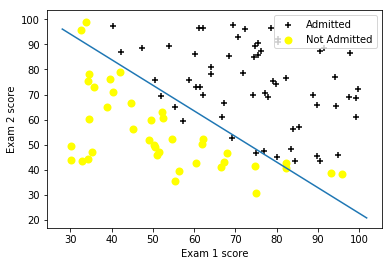

In [15]:
# Plot Boundary
plotDecisionBoundary(theta, X, y)

# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc= 'upper right')

============== Part 4: Predict and Accuracies ==============

After learning the parameters, you'll like to use it to predict the outcomes
on unseen data. In this part, you will use the logistic regression model
to predict the probability that a student with score 45 on exam 1 and 
score 85 on exam 2 will be admitted.

Furthermore, you will compute the training and test set accuracies of our model.

Predict probability for a student with score 45 on exam 1 and score 85 on exam 2

In [16]:
prob = sigmoid( np.dot(np.array([1, 45, 85], ndmin=2), theta) ).item()
print('For a student with scores 45 and 85, we predict an admission probability of ', prob)
print('Expected value: 0.775 +/- 0.002')

For a student with scores 45 and 85, we predict an admission probability of  0.77629062453048
Expected value: 0.775 +/- 0.002


In [17]:
def predict(theta, X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic 
    regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a 
    threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    
    p = sigmoid( np.dot(X, theta) )
    p[p >= 0.5] = 1
    p[p < 0.5] = 0
    return p

In [18]:
# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: ', np.mean(p==y) * 100)
print('Expected accuracy (approx): 89.0')

Train Accuracy:  89.0
Expected accuracy (approx): 89.0
